In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[-2.81715557e-02  9.41759555e-05  1.40221006e-02 ...  3.17568461e-03
 -1.32421274e-02 -1.32634272e-02]


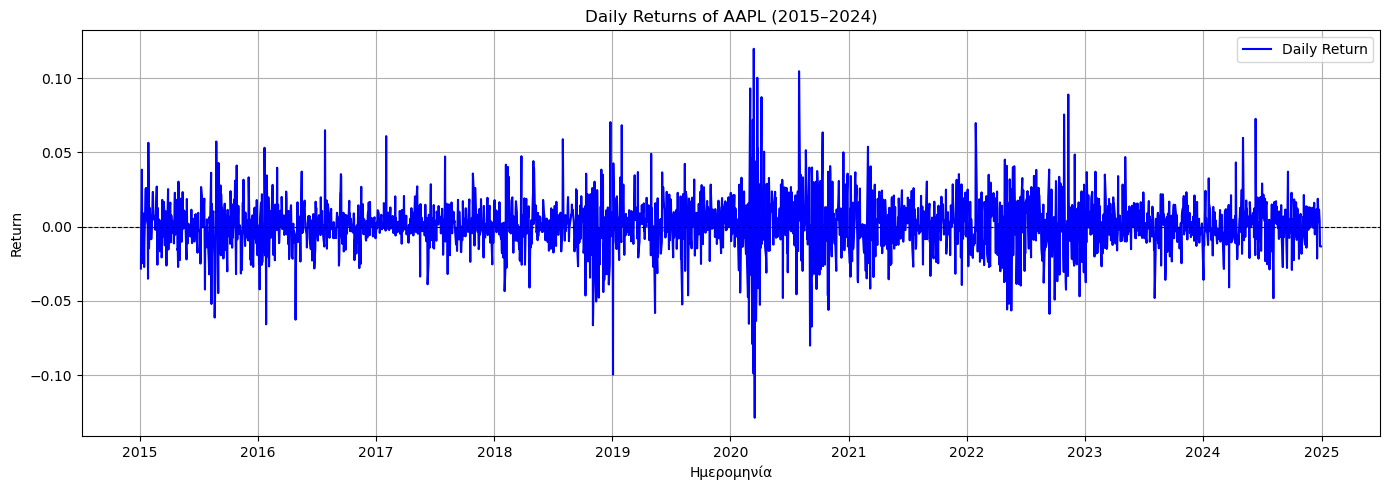

In [2]:

# Φέρνουμε τα δεδομένα
aapl = yf.Ticker("AAPL")
df = aapl.history(start="2015-01-01", end="2024-12-31")

# Υπολογίζουμε τα daily returns
df['Return'] = df['Close'].pct_change()

# Φιλτράρουμε τα NaN (πρώτη γραμμή)
returns = df['Return'].dropna().values

# Αποθήκευση ως NumPy αρχείο
np.save("aapl_daily_returns.npy", returns)

print(returns)
print(

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Return'], label='Daily Return', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Daily Returns of AAPL (2015–2024)") 
plt.xlabel("Ημερομηνία")
plt.ylabel("Return")
plt.grid(True) 
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,
2015-01-02 00:00:00-05:00,24.778679,24.789802,23.879981,24.320433,212818400,0.0,0.0,NaN
2015-01-05 00:00:00-05:00,24.089086,24.169168,23.448431,23.635288,257142000,0.0,0.0,-0.028172
2015-01-06 00:00:00-05:00,23.699800,23.897780,23.274920,23.637514,263188400,0.0,0.0,0.000094
2015-01-07 00:00:00-05:00,23.846614,24.069063,23.735389,23.968962,160423600,0.0,0.0,0.014022
2015-01-08 00:00:00-05:00,24.298183,24.947736,24.180283,24.889898,237458000,0.0,0.0,0.038422
...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,254.490204,255.369227,253.171646,254.989655,40858800,0.0,0.0,0.003065
2024-12-24 00:00:00-05:00,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,0.011478
2024-12-26 00:00:00-05:00,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,0.003176


[*********************100%***********************]  1 of 1 completed


Next-day prediction shapes:
X_train: (1780, 60, 1) | y_train: (1780, 1)
X_valid: (381, 60, 1) | y_valid: (381, 1)
X_test:  (382, 60, 1) | y_test:  (382, 1)
Seven-day prediction shapes:
X_train: (1775, 60, 1) | y_train: (1775, 1)
X_valid: (381, 60, 1) | y_valid: (381, 1)
X_test:  (381, 60, 1) | y_test:  (381, 1)
Training SimpleRNN...
Training DeepRNN...
Training LSTM...
Training GRU...
Training Bidirectional...


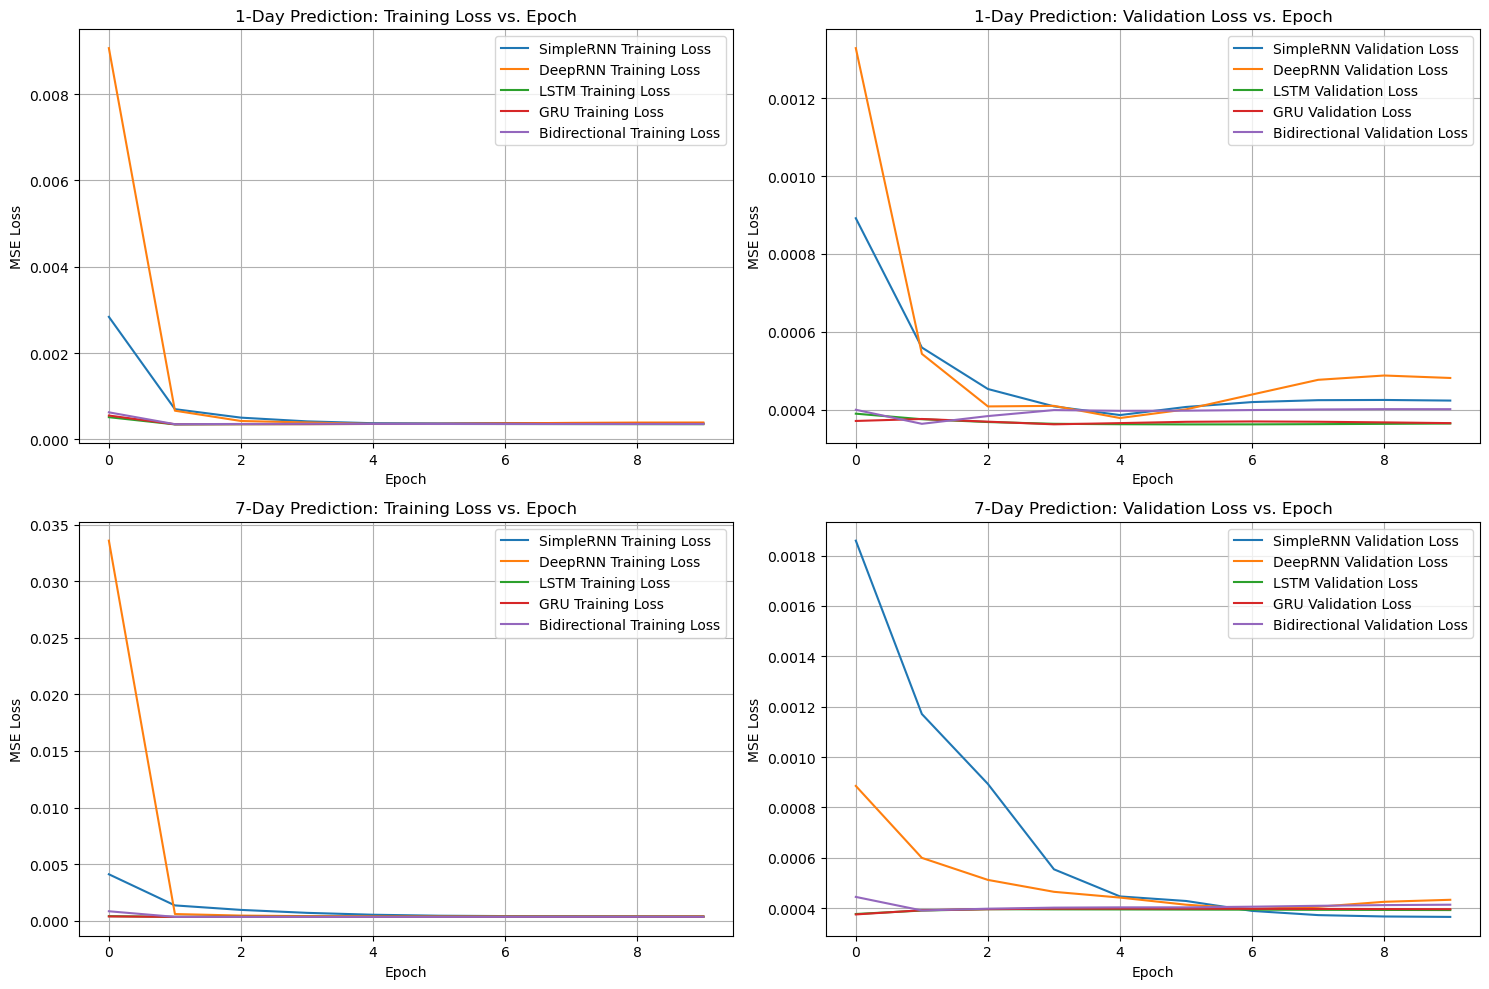

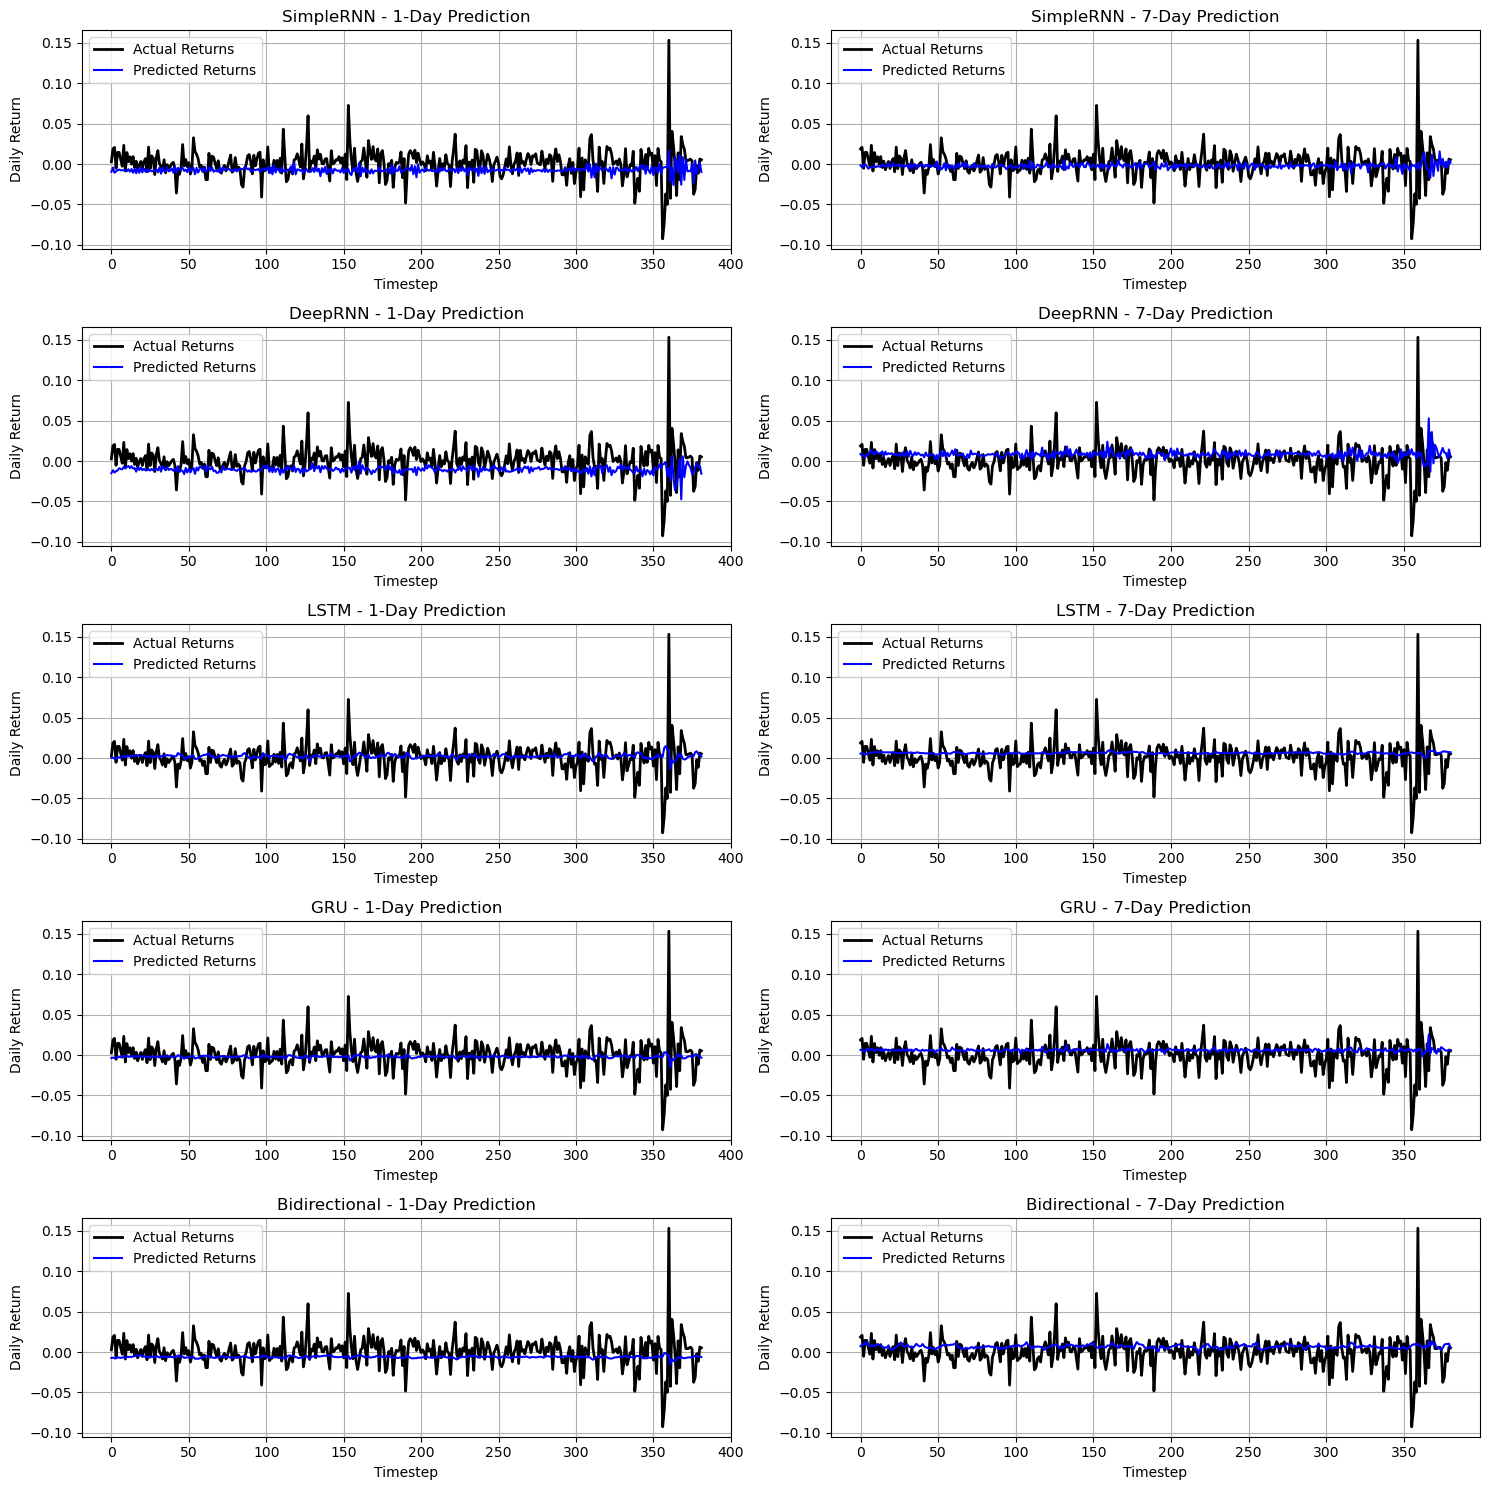


Summary of Model Performance:
           Model  1-Day MSE  1-Day MAE  7-Day MSE  7-Day MAE
0      SimpleRNN   0.000401   0.014551   0.000356   0.012747
1        DeepRNN   0.000475   0.016204   0.000422   0.014184
2           LSTM   0.000346   0.012212   0.000368   0.012847
3            GRU   0.000345   0.012461   0.000370   0.012890
4  Bidirectional   0.000381   0.013788   0.000377   0.013200

Best Model for 1-Day Prediction (lowest MSE): GRU
Best Model for 7-Day Prediction (lowest MSE): SimpleRNN


In [56]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load stock data
stock_symbol = 'AAPL'  # Change to any stock ticker
data = yf.download(stock_symbol, start='2015-01-01', end='2025-05-12')
prices = data['Close']

# Step 2: Compute daily returns
returns = prices.pct_change().dropna()  # Daily return = (price_t - price_{t-1}) / price_{t-1}

# Step 3: Prepare sequences for RNN
def create_sequences(data, seq_length, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:i + seq_length])  # Sequence of seq_length returns
        y.append(data[i + seq_length + forecast_horizon - 1])  # Target: return at t+forecast_horizon
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of returns to predict
# Next-day prediction (forecast_horizon=1)
X_1day, y_1day = create_sequences(returns.values, seq_length, forecast_horizon=1)
# Seven-day prediction (forecast_horizon=7)
X_7day, y_7day = create_sequences(returns.values, seq_length, forecast_horizon=7)

# Step 4: Split data into train, validation, and test sets
# Next-day
X_train_1day, X_temp_1day, y_train_1day, y_temp_1day = train_test_split(
    X_1day, y_1day, test_size=0.3, random_state=42, shuffle=False)
X_valid_1day, X_test_1day, y_valid_1day, y_test_1day = train_test_split(
    X_temp_1day, y_temp_1day, test_size=0.5, random_state=42, shuffle=False)

# Seven-day
X_train_7day, X_temp_7day, y_train_7day, y_temp_7day = train_test_split(
    X_7day, y_7day, test_size=0.3, random_state=42, shuffle=False)
X_valid_7day, X_test_7day, y_valid_7day, y_test_7day = train_test_split(
    X_temp_7day, y_temp_7day, test_size=0.5, random_state=42, shuffle=False)

# Step 5: Scale the data
scaler = MinMaxScaler()
# Fit scaler on training data only
X_train_1day = scaler.fit_transform(X_train_1day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)
X_valid_1day = scaler.transform(X_valid_1day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)
X_test_1day = scaler.transform(X_test_1day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)

X_train_7day = scaler.fit_transform(X_train_7day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)
X_valid_7day = scaler.transform(X_valid_7day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)
X_test_7day = scaler.transform(X_test_7day.reshape(-1, seq_length)).reshape(-1, seq_length, 1)

# Print shapes to verify (adapted from your snippet)
print('Next-day prediction shapes:')
print(f'X_train: {X_train_1day.shape} | y_train: {y_train_1day.shape}')
print(f'X_valid: {X_valid_1day.shape} | y_valid: {y_valid_1day.shape}')
print(f'X_test:  {X_test_1day.shape} | y_test:  {y_test_1day.shape}')
print('Seven-day prediction shapes:')
print(f'X_train: {X_train_7day.shape} | y_train: {y_train_7day.shape}')
print(f'X_valid: {X_valid_7day.shape} | y_valid: {y_valid_7day.shape}')
print(f'X_test:  {X_test_7day.shape} | y_test:  {y_test_7day.shape}')

# Step 6: Define RNN models
def build_simple_rnn():
    model = Sequential([
        SimpleRNN(32, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_deep_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, 1)),
        SimpleRNN(32),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm():
    model = Sequential([
        LSTM(32, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru():
    model = Sequential([
        GRU(32, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_bidirectional():
    model = Sequential([
        Bidirectional(LSTM(32), input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# List of models
models = {
    'SimpleRNN': build_simple_rnn,
    'DeepRNN': build_deep_rnn,
    'LSTM': build_lstm,
    'GRU': build_gru,
    'Bidirectional': build_bidirectional
}

# Step 7: Train models and store histories
results = {'1day': {}, '7day': {}}

for name, build_fn in models.items():
    print(f'Training {name}...')
    # Next-day prediction
    model_1day = build_fn()
    history_1day = model_1day.fit(
        X_train_1day, y_train_1day,
        epochs=10,
        batch_size=32,
        validation_data=(X_valid_1day, y_valid_1day),
        verbose=0
    )
    y_pred_1day = model_1day.predict(X_test_1day, verbose=0)
    mse_1day = mean_squared_error(y_test_1day, y_pred_1day)
    mae_1day = mean_absolute_error(y_test_1day, y_pred_1day)
    results['1day'][name] = {
        'mse': mse_1day,
        'mae': mae_1day,
        'predictions': y_pred_1day,
        'history': history_1day.history
    }

    # Seven-day prediction
    model_7day = build_fn()
    history_7day = model_7day.fit(
        X_train_7day, y_train_7day,
        epochs=10,
        batch_size=32,
        validation_data=(X_valid_7day, y_valid_7day),
        verbose=0
    )
    y_pred_7day = model_7day.predict(X_test_7day, verbose=0)
    mse_7day = mean_squared_error(y_test_7day, y_pred_7day)
    mae_7day = mean_absolute_error(y_test_7day, y_pred_7day)
    results['7day'][name] = {
        'mse': mse_7day,
        'mae': mae_7day,
        'predictions': y_pred_7day,
        'history': history_7day.history
    }

# Step 8: Plot Loss vs. Epochs - Combined for all models
plt.figure(figsize=(15, 10))

# 1-Day Prediction
plt.subplot(2, 2, 1)
for name in models:
    plt.plot(results['1day'][name]['history']['loss'], label=f'{name} Training Loss')
plt.title('1-Day Prediction: Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for name in models:
    plt.plot(results['1day'][name]['history']['val_loss'], label=f'{name} Validation Loss')
plt.title('1-Day Prediction: Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# 7-Day Prediction
plt.subplot(2, 2, 3)
for name in models:
    plt.plot(results['7day'][name]['history']['loss'], label=f'{name} Training Loss')
plt.title('7-Day Prediction: Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for name in models:
    plt.plot(results['7day'][name]['history']['val_loss'], label=f'{name} Validation Loss')
plt.title('7-Day Prediction: Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 9: Plot Predictions vs. Actual - Separate for each model
plt.figure(figsize=(15, 15))
for i, name in enumerate(models, 1):
    # 1-Day Prediction
    plt.subplot(len(models), 2, 2*i-1)
    plt.plot(y_test_1day, label='Actual Returns', color='black', linewidth=2)
    plt.plot(results['1day'][name]['predictions'], label='Predicted Returns', color='blue')
    plt.title(f'{name} - 1-Day Prediction')
    plt.xlabel('Timestep')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)

    # 7-Day Prediction
    plt.subplot(len(models), 2, 2*i)
    plt.plot(y_test_7day, label='Actual Returns', color='black', linewidth=2)
    plt.plot(results['7day'][name]['predictions'], label='Predicted Returns', color='blue')
    plt.title(f'{name} - 7-Day Prediction')
    plt.xlabel('Timestep')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Step 10: Summary Table of Metrics
metrics_data = {
    'Model': [],
    '1-Day MSE': [],
    '1-Day MAE': [],
    '7-Day MSE': [],
    '7-Day MAE': []
}

for name in models:
    metrics_data['Model'].append(name)
    metrics_data['1-Day MSE'].append(results['1day'][name]['mse'])
    metrics_data['1-Day MAE'].append(results['1day'][name]['mae'])
    metrics_data['7-Day MSE'].append(results['7day'][name]['mse'])
    metrics_data['7-Day MAE'].append(results['7day'][name]['mae'])

metrics_df = pd.DataFrame(metrics_data)
print("\nSummary of Model Performance:")
print(metrics_df)

# Step 11: Highlight Best Model
best_1day_model = metrics_df.loc[metrics_df['1-Day MSE'].idxmin()]['Model']
best_7day_model = metrics_df.loc[metrics_df['7-Day MSE'].idxmin()]['Model']
print(f"\nBest Model for 1-Day Prediction (lowest MSE): {best_1day_model}")
print(f"Best Model for 7-Day Prediction (lowest MSE): {best_7day_model}")
